# GRADED CHALLENGE 2

Ahmad Luay Adnani
FTDS-018-RMT

# Perkenalan

Bab ini mengenai latar belakang permasalahan dan problem statement yang ingin dibahas.

## Latar Belakang

### Latar Belakang Permasalahan

Saya adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. 

### Problem permasalahan yang ingin dibahas

Dengan mengolah data menggunakan ilmu matematika seperti statistik dan kalkulus, kita dapat memberikan saran ke pemerintah kota Austin sistem apa yang kita tambahkan atau lakukan untuk pembuangan dan pengeloalaan sampah di kota Austin.

# SQL Queries

Bagian ini menjelaskan cara untuk memperoleh data menggunakan SQL BigQuery, melingkupi kesesuaian kode dengan tabel yang dihasilkan

## Cara menggunakan SQL BigQuerry

Data yang didapat merupakan data dari Google Cloud Big Query yaitu tabel `waste_and_diversion` pada dataset `austin_waste`. Query yang dilakukan memiliki kriteria yaitu hanya kolom `report_date`,`load_time`, `load_type`, `load_weight`, `dropoff_site` serta tahun 2021 saja. Berikut langkah-langkah untuk melakukan query:

1. Buka Console Google Cloud.
2. Kemudian pilih dataset `austin_waste` selanjutnya pilih tabel `waste_and_diversion`.
3. Centang Field name `report_date`,`load_time`, `load_type`, `load_weight`, `dropoff_site`.
4. Klik tab query pilih "In New Tab"
5. Di tab query input seperti dibawah ini:

```
SELECT report_date, load_type, load_time, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion` 
WHERE report_date BETWEEN "2021-01-01" AND "2021-12-31"
```


6. Save result as .CSV to local.

# Import Library

Bagian ini menjelaskan tentang cara untuk impor library yang digunakan. Library yang digunakan antara lain __numpy, scipy, pandas, matplotlib__ dan __seaborn__. Cara untuk mengimpor library sebagai berikut:

In [1043]:
#import library dan cek versi
import numpy as np
import scipy as sp
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
print("Versi numpy : ",np.__version__)
print("Versi scipy : ",sp.__version__)
print("Versi pandas : ",pd.__version__)

Versi numpy :  1.24.1
Versi scipy :  1.10.0
Versi pandas :  1.5.3


# Data Preprocessing

Bagian ini menjelaskan cara mempersiapkan data sampai siap digunakan dalam perhitungan serta mengetahui informasi yang terdapat dari dataset yang ada.

## Data Loading

Data loading dilakukan menggunakan rumus `pandas.read_csv()`. Untuk menampilkan 5 data teratas menggunakan fungsi `dataframe.head()` dan untuk menampilkan 5 data terbawah menggunakan fungsi `dataframe.tail()`.

- Tampilan 5 data teratas

In [1044]:
#  data loading
df = pd.read_csv("h8dsft_P0GC2_Ahmad Luay Adnani.csv")
# menampilkan 5 baris teratas
df.head()

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00 UTC,1400.0,MRF


- Tampilan 5 data terbawah

In [1045]:
# menampilkan 5 baris terbawah
df.tail()

,report_date,load_type,load_time,load_weight,dropoff_site
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00 UTC,5640.0,ORGANICS BY GOSH
26156,2021-03-01,RECYCLED METAL,2021-03-01 10:22:00 UTC,360.0,AUSTIN IRON AND METAL


Berikut merupakan variabel dan definsi dari masing-masing kolom:

Nama Kolom | Definisi
---|---
`report_date` | Tanggal pencatatan data.
`load_type` | Jenis sampah/limbah yang dimuat.
`load_time` | Waktu ketika sampah/limbah diangkut.
`load_weight` | Berat muatan sampah/limbah.
`dropoff_site` | Tempat pembuangan sampah.


In [1046]:
# mengetahui jumlah baris dan kolom
df.shape

(26157, 5)

Diketahui dataset diatas memiliki __26.157__ baris dan __5__ kolom.

## Informasi

Untuk menampilkan informasi digunakan fungsi `Dataframe.info()`.

In [1047]:
# menampilkan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_type     26157 non-null  object 
 2   load_time     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Didapat informasi terkait dataset diatas kolom `report_date`, `load_type`, `load_time` dan `dropoff_site` memiliki __26.157__ nilai. Sedangkan kolom `load_weight` hanya  __25.109__ yang memiliki nilai hal ini menunjukkan kolom ini terdapat _missing value_.

## Cek Duplikasi

Untuk cek duplikasi digunakan fungsi `pandas.DataFrame.duplicated()`.

In [1048]:
# menghitung jumlah baris yang terduplikasi
df.duplicated().value_counts()

False    25712
True       445
dtype: int64

In [1049]:
# menampilkan baris yang terduplikasi
duplicate = df[df.duplicated()]
duplicate.sort_values(by=["report_date"])

,report_date,load_type,load_time,load_weight,dropoff_site
124,2021-01-01,SWEEPING,2021-01-01 12:00:00 UTC,NaN,ONION CREEK
125,2021-01-01,SWEEPING,2021-01-01 12:00:00 UTC,NaN,ONION CREEK
126,2021-01-01,SWEEPING,2021-01-01 12:00:00 UTC,NaN,ONION CREEK
19133,2021-01-02,SWEEPING,2021-01-02 12:00:00 UTC,NaN,ONION CREEK
19134,2021-01-02,SWEEPING,2021-01-02 12:00:00 UTC,NaN,ONION CREEK
...,...,...,...,...,...
206,2021-07-09,BRUSH,2021-07-09 05:40:00 UTC,5500.0,HORNSBY BEND
148,2021-07-09,SWEEPING,2021-07-09 12:00:00 UTC,NaN,ONION CREEK
47,2021-07-09,SWEEPING,2021-07-09 12:00:00 UTC,NaN,ONION CREEK
109,2021-07-09,SWEEPING,2021-07-09 12:00:00 UTC,NaN,ONION CREEK


Dari tabel diatas diketahui sebanyak __445__ baris terduplikasi.

## Data Cleaning

Dibagian ini menjelaskan mengenai cara melakukan data cleaning dimulai dari menghapus data yang terduplikasi, mengidentifikasi missing value dan menangani missing value.

### Drop Baris Yang Terduplikasi

Untuk menghapus baris yang terduplikasi digunakan fungsi `pandas.DataFrame.drop_duplicates()`.

In [1050]:
# menyalin dataset
df_copy =df.copy()

In [1051]:
# Menghapus baris yang terduplikasi
df_copy = df_copy.drop_duplicates()

In [1052]:
# cek ulang apakah masih ada baris yang terduplikasi
df_copy.duplicated().value_counts()

False    25712
dtype: int64

Baris yang terduplikasi sekarang sudah terhapus. Jumlah baris keseluruhan dari dataset menjadi __25.712__ baris.

### Identifikasi Missing Value

Untuk menidentifikasi kolom mana sajakah yang memiliki missing value digunakan fungsi `pandas.DataFrame.isnull().sum()`.

In [1053]:
# Mengidentifikasi kolom mana saja yang memiliki missing value
df_copy.isnull().sum()

report_date       0
load_type         0
load_time         0
load_weight     629
dropoff_site      0
dtype: int64

Diketahui terdapat __629__ baris dari total __25.712__ baris atau sekitar __2.45%__.yang tidak memiliki nilai di kolom `load_weight`.

### Mengatasi Missing Value

__629__ baris tersebut dapat dihapus karena persentase missing value nya __< 5%__ dari keseluruhan. Cara menghapusnya dapat menggunakan `dataframe.dropna()`.

In [1054]:
#menghapus baris yang memiliki missing value
df_copy.dropna(inplace=True)

In [1055]:
#cek kembali apakah masih memiliki missing value
df_copy.isnull().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

In [1056]:
# mengetahui jumlah baris setelah diatasi missing valuenya
df_copy.shape

(25083, 5)

Dataset sekarang sudah tidak memiliki missing value selanjutnya siap digunakan. Jumlah baris yang semula __25.712__ menjadi __25.083__ baris.

# Data Exploration

Data exploration yang dilakukan antara lain melihat rentang waktu pengambilan data, mengetahui jenis muatan sampah dan mengetahui lokasi tempat pembuangan sampah.

## - Melihat rentang waktu pengambilan data:

In [1057]:
# sort by date agar diketahui tanggal awal dan akhir nya.
df_copy.sort_values(by=["report_date"])

,report_date,load_type,load_time,load_weight,dropoff_site
19228,2021-01-02,ORGANICS,2021-01-04 07:04:00 UTC,8460.0,ORGANICS BY GOSH
19161,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:56:00 UTC,17160.0,TDS LANDFILL
19162,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 01:42:00 UTC,15240.0,TDS LANDFILL
19163,2021-01-02,MIXED LITTER,2021-01-02 08:47:00 UTC,4540.0,TDS LANDFILL
19164,2021-01-02,MIXED LITTER,2021-01-02 11:34:00 UTC,6620.0,TDS LANDFILL
...,...,...,...,...,...
211,2021-07-09,BRUSH,2021-07-09 06:00:00 UTC,5500.0,HORNSBY BEND
207,2021-07-09,BRUSH,2021-07-09 02:57:00 UTC,5500.0,HORNSBY BEND
208,2021-07-09,BRUSH,2021-07-09 03:45:00 UTC,5500.0,HORNSBY BEND
210,2021-07-09,BRUSH,2021-07-09 01:12:00 UTC,7000.0,HORNSBY BEND


Cara untuk melihat rentang waktu pengambilan data yaitu dengan mencari nilai minimum dan maksimum dari kolom `report_date` menggunakan fungsi `.min() `dan `.max()`.

In [1058]:
#menampilkan tanggal pertama kali pencatatan data
df_copy["report_date"].min()

'2021-01-02'

In [1059]:
#menampilkan tanggal terakhir kali pencatatan data
df_copy["report_date"].max()

'2021-07-09'

Diketahui rentang waktu pengambilan data yaitu __2021-01-01__ hingga __2021-07-09__.

## - Mengetahui apa saja jenis muatan sampah di kota Austin

Untuk mengetahui jenis muatan sampah apa saja di kota Austin dapat menggunakan fungsi `pandas.Series.value_counts()` pada kolom `load_type`.

In [1060]:
#menampilkan jenis sampah (load_type)
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Diketahui jenis muatan sampah di kota Austin yaitu: __GARBAGE COLLECTIONS, RECYCLING - SINGLE STREAM, ORGANICS, BULK, BRUSH, SWEEPING, MIXED LITTER, TIRES, DEAD ANIMAL, YARD TRIMMING, RECYCLED METAL, LITTER, CONTAMINATED RECYCLING dan CONTAMINATED ORGANICS__.

## - Mengetahui lokasi tempat pembuangan sampah dimana saja

Untuk mengetahui dimana saja lokasi tempat pembuangan sampah dapat menggunakan fungsi `pandas.Series.value_counts()` pada kolom `dropoff_site`.

In [1061]:
#menampilkan lokasi tempat pembuangan (dropoff_site)
df_copy["dropoff_site"].value_counts()

TDS LANDFILL             10684
ORGANICS BY GOSH          5732
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1648
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

Diketahui lokasi tempat pembuangan sampah di kota Austin yaitu: __TDS LANDFILL, ORGANICS BY GOSH, BALCONES RECYCLING, TDS - MRF, HORNSBY BEND, ONION CREEK, MRF, ON ROUTE HIGH DUMP, PARK CENTER, GREAT NORTHERN, AUSTIN IRON AND METAL, PARK BEND, AUSTIN WOOD RECYCLING, BALCONES WOODS, STEINER LANDFILL dan WESTFIELD__.

# Central Tendency

Central tendency yang dilakukan yaitu menghitung mean, median dan modus nilai berat muatan berdasarkan tempat pembuangannya.

## Mean masing-masing site.

Untuk mencari nilai rata-rata (_mean_) berat muatan untuk masing-masing tempat pembuangan digunakan fungsi `dataframe.groupby.mean()`. Di groupby berdasarkan `dropoff_site` terhadap `load_weight`.

In [1062]:
#mencari mean
df_copy.groupby(by="dropoff_site",sort=True)["load_weight"].apply(pd.Series.mean).to_frame()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,451.200000
AUSTIN WOOD RECYCLING,4050.000000
BALCONES RECYCLING,9464.934760
BALCONES WOODS,8460.000000
GREAT NORTHERN,19153.333333
HORNSBY BEND,6636.638350
MRF,1799.982143
ON ROUTE HIGH DUMP,12525.714286
ORGANICS BY GOSH,11824.135729


Tabel diatas menampilkan nilai rata-rata (_mean_) berat muatan pada masing-masing tempat pembuangan. Sebagai contoh di tempat pembuangan  __AUSTIN IRON AND METAL__ memiliki nilai rata-rata berat muatan sebesar 451.2 kg.

## Median masing-masing site.

Untuk mencari nilai tengah (_median_) berat muatan untuk masing-masing tempat pembuangan digunakan fungsi `dataframe.groupby.median()`. Di groupby berdasarkan `dropoff_site` terhadap `load_weight`.

In [1063]:
#mencari median
df_copy.groupby(by="dropoff_site",sort=True)["load_weight"].apply(pd.Series.median).to_frame()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,21110.0
HORNSBY BEND,6400.0
MRF,1360.0
ON ROUTE HIGH DUMP,14940.0
ORGANICS BY GOSH,11920.0


Tabel diatas menampilkan nilai tengah (_median_) berat muatan pada masing-masing tempat pembuangan. Sebagai contoh tempat pembuangan  __AUSTIN IRON AND METAL__ memiliki nilai tengah berat muatan sebesar 400 kg.

## Modus masing-masing site.

Untuk mencari nilai berat muatan yang paling sering muncul (_modus_) untuk masing-masing site digunakan fungsi `dataframe.groupby.mode()`. Di groupby berdasarkan `dropoff_site` terhadap `load_weight`.

In [1064]:
#mencari modus
df_copy.groupby(by="dropoff_site",sort=True)["load_weight"].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                        
AUSTIN IRON AND METAL 0        260.0
                      1        320.0
                      2        520.0
AUSTIN WOOD RECYCLING 0       2340.0
                      1       5760.0
BALCONES RECYCLING    0      11880.0
BALCONES WOODS        0       8460.0
GREAT NORTHERN        0       8700.0
                      1      17160.0
                      2      20900.0
                      3      21320.0
                      4      21960.0
                      5      24880.0
HORNSBY BEND          0       5500.0
MRF                   0        960.0
ON ROUTE HIGH DUMP    0       4060.0
                      1       7480.0
                      2      12500.0
                      3      14940.0
                      4      15040.0
                      5      15200.0
                      6      18460.0
ORGANICS BY GOSH      0      14580.0
PARK BEND             0       8480.0
                      1       8960.0
                      2      15700.0
                      3      20400.0
STEINER LANDFILL      0        780.0
TDS - MRF             0      10360.0
TDS LANDFILL          0         20.0
                      1         60.0
                      2      12020.0
WESTFIELD             0      16020.0

Tabel diatas menampilkan nilai yang paling sering muncul (_modus_) berat muatan di masing-masing tempat pembuangan. Sebagai contoh pada tempat pembuangan __AUSTIN IRON AND METAL__ memiliki 3 nilai berat muatan yang paling sering muncul yaitu sebesar 260 kg, 320 kg dan 520 kg.

# Tempat pembuangan yang diamati

In [1065]:
# memperlihat jenis sampah apa saja yang dibuang
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

terdapat jenis sampah yaitu __ORGANICS__ sebanyak 5.740 jenis, yang artinya sampah tersebut adalah limbah organik. Limbah organik adalah sisa bahan atau sampah yang dapat didaur ulang dan berasal dari mahluk hidup. Selanjutnya dapat diamati jenis limbah organik dibuang ke tempat pembuangan mana saja seperti dibawah ini.

In [1066]:
# menampilkan lokasi tempat pembuangan jenis sampah organis
organics = df_copy.loc[df_copy['load_type']=='ORGANICS']
organics["dropoff_site"].value_counts()

ORGANICS BY GOSH      5705
TDS LANDFILL            22
ON ROUTE HIGH DUMP       7
PARK BEND                4
HORNSBY BEND             2
Name: dropoff_site, dtype: int64

In [1067]:
# jumlah berat muatan masing-masing lokasi tempat pembuangan
sum_organics = organics.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum()
sum_organics

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67671006.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

Diketahui limbah organik paling banyak di buang ke tempat pembuangan __ORGANICS BY GOSH__ dan berat limbah organik yang dibuang mencapai __67.671.006__ kg. Selanjutnya dicari berapa banyak data limbah organik yang tempat pembuangan nya __ORGANICS BY GOSH__.

In [1068]:
# memfilter hanya untuk tempat pembuangan organics by gosh
organics_by_gosh = organics.loc[df['dropoff_site']=='ORGANICS BY GOSH']
organics_by_gosh

,report_date,load_type,load_time,load_weight,dropoff_site
775,2021-02-21,ORGANICS,2021-02-21 10:41:00 UTC,2480.0,ORGANICS BY GOSH
776,2021-03-14,ORGANICS,2021-03-14 01:37:00 UTC,21700.0,ORGANICS BY GOSH
777,2021-03-21,ORGANICS,2021-03-21 07:56:00 UTC,7120.0,ORGANICS BY GOSH
778,2021-02-21,ORGANICS,2021-02-21 11:07:00 UTC,5560.0,ORGANICS BY GOSH
779,2021-03-14,ORGANICS,2021-03-14 03:04:00 UTC,20460.0,ORGANICS BY GOSH
...,...,...,...,...,...
26151,2021-03-01,ORGANICS,2021-03-01 11:19:00 UTC,18580.0,ORGANICS BY GOSH
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00 UTC,21800.0,ORGANICS BY GOSH


In [1069]:
# jumlah data limbah organis lokasi tempat pembuangan organics by gosh
organics_by_gosh_value = organics.loc[df['dropoff_site']=='ORGANICS BY GOSH'].value_counts().sum()
organics_by_gosh_value

5705

terdapat __5.705__ limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__.

In [1070]:
# jumlah data jenis limbah organis
organics_value = organics.value_counts().sum()
organics_value

5740

Diketahui terdapat __5.740__ jenis sampah limbah organik.

In [1071]:
#persentase limbah organis di tempat pembuangan ORGANICS BY GOSH dibandingkan total keseluruhan jenis limbah organis 
perc = organics_by_gosh_value/ organics_value *100
print(perc,"%")

99.39024390243902 %


Didapatkan informasi __99,39%__ limbah organik dibuang ke tempat pembuangan __ORGANICS BY GOSH__. 

## Cek Distribusi Data

Untuk melihat distribusi data dapat menggunakan visualisasi dalam bentuk histogram seperti dibawah ini.

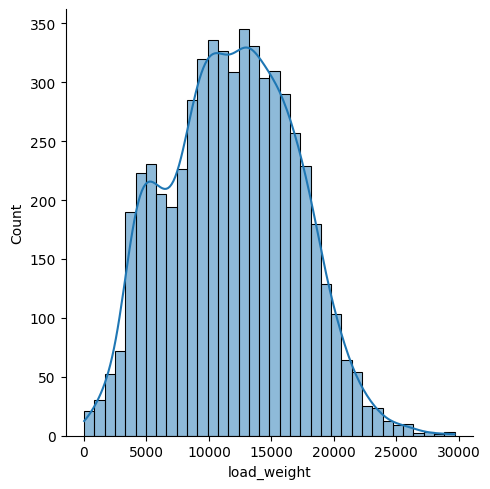

In [1072]:
# membuat histogram
sns.displot(organics_by_gosh.load_weight, kde=True)

Setelah melihat bentuk histogram dapat dilakukan perhitungan kemiringan (_skew_) dengan cara berikut:

In [1073]:
#menghitung kemiringan (skew)
organics_by_gosh['load_weight'].skew()

0.07617790250092829

Didapat nilai kemiringan sebesar __0,07__. Karena kemiringannya mendekati angka 0 maka bisa dikatakan datanya __terdistribusi normal__ dan kemiringannya simetris. Selanjutnya dilakukan pengecekan outlier.

## Mendeteksi Outlier

Untuk pengecekan outlier langkah pertama yang dilakukan adalah membuat boxplot.

<AxesSubplot: ylabel='load_weight'>

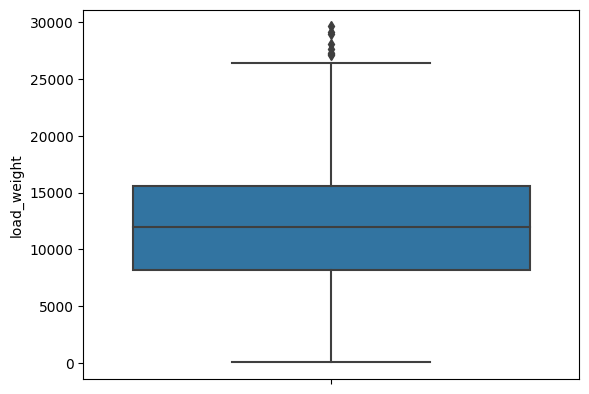

In [1074]:
#boxplot menggunakan seaborn
sns.boxplot(data=organics_by_gosh, y = 'load_weight')


Dari gambar diatas terdapat beberapa titik diatas yang menunjukkan adanya outlier. Metode yang digunakan untuk mendeteksi outlier adalah __z-score rule__ karena datanya terdistribusi normal. Langkah selanjutnya dapat mencari central tendency kolom `load_weight` dengan tempat pembuangan  __ORGANIC BY GOSH__.

## Central tendency dengan adanya outlier 

- Mean dengan adanya outlier

In [1075]:
# cari mean 
organics_by_gosh_mean = organics_by_gosh['load_weight'].mean()
organics_by_gosh_mean

11861.701314636284

Nilai rata-rata berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __11.824,14__ kg.

- Mean dengan adanya outlier

In [1076]:
#cari mean karena datanya terdistribusi normal tidak perlu menghitung iqr
organics_by_gosh_median = organics_by_gosh['load_weight'].quantile([.25,.50,.75])
organics_by_gosh_median

0.25     8200.0
0.50    11940.0
0.75    15560.0
Name: load_weight, dtype: float64

Nilai kuartil 1, kuartil 2 (_median_) dan nilai kuartil 3 berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __8.155__ kg, __11.920__ kg dan __15.545__ kg.

- Modus dengan adanya outlier

In [1077]:
#cari modus
organics_by_gosh_mode = organics_by_gosh['load_weight'].mode()
organics_by_gosh_mode

0    14580.0
Name: load_weight, dtype: float64

Nilai modus berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __14.580__ kg.

## Measure of Variance

### Range

Rentang (_range_) didapat dengan cara nilai maksimum dikurang dengan nilai minimum.

In [1078]:
# menentukan range diperlukan nilai min dan
organic_range_min = organics_by_gosh["load_weight"].min()
organic_range_max = organics_by_gosh["load_weight"].max()

In [1079]:
#range = max - min
organic_range = organic_range_max - organic_range_min
organic_range

29640.0

Didapatkan nilai rentang (_range_) berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __29.640__ kg

### Variance

Variance didapat dengan fungsi `pandas.dataframe.var()`.

In [1080]:
#menghitung variance
organics_by_gosh['load_weight'].var()

25350749.50123425

Didapat nilai variance __25.350.749,5__ yang menunjukkan sebaran data sangat besar dari nilai rata-ratanya.

### Standar Deviasi

Standar deviasi didapat dengan menggunakan fungsi `pandas.dataframe.std()`.

In [1081]:
# menghitung standar deviasi
organics_by_gosh_std = organics_by_gosh['load_weight'].std()
organics_by_gosh_std

5034.952780437395

Didapat nilai standar deviasi __5.034,95__ yang menunjukkan sebaran data sangat besar dari nilai rata-ratanya.

### Menentukan Upper Limit dan Lower Limit

Karena terdistribusi normal maka yang digunakan adalah nilai __mean__. rumus untuk menentukan rentang upper limit outlier dan lower limit outlier : 

``` Outliers = mean+/-3*std ```

- Menentukan Upper Limit

In [1082]:
# menentukan upper limit, normal dengan mean sedangkan tidak normal menggunakan median.
outliers_plus = organics_by_gosh_mean + 3*organics_by_gosh_std
outliers_plus

26966.55965594847

Didapatkan upper limit berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __26.966.,55__ kg.

In [1083]:
# melebihi upper limit
organics_by_gosh.loc[organics_by_gosh['load_weight'] > outliers_plus]

,report_date,load_type,load_time,load_weight,dropoff_site
3443,2021-03-15,ORGANICS,2021-03-15 12:00:00 UTC,27240.0,ORGANICS BY GOSH
14594,2021-06-02,ORGANICS,2021-06-02 05:39:00 UTC,28120.0,ORGANICS BY GOSH
14759,2021-06-03,ORGANICS,2021-06-03 07:05:00 UTC,29660.0,ORGANICS BY GOSH
15165,2021-06-07,ORGANICS,2021-06-07 12:00:00 UTC,29000.0,ORGANICS BY GOSH
16120,2021-06-14,ORGANICS,2021-06-14 06:15:00 UTC,29160.0,ORGANICS BY GOSH
16299,2021-06-15,ORGANICS,2021-06-15 02:07:00 UTC,27120.0,ORGANICS BY GOSH
25825,2021-02-26,ORGANICS,2021-02-26 05:12:00 UTC,27620.0,ORGANICS BY GOSH
26116,2021-03-01,ORGANICS,2021-03-01 05:36:00 UTC,27300.0,ORGANICS BY GOSH


Terdapat __8 outlier__ yang melebihi upper limit. Selanjutnya dengan cara yang sama dapat mencari outlier yang melebihi lower limit.

- Menentukan Lower Limit

In [1084]:
# menentukan lower limit, normal dengan mean sedangkan tidak normal menggunakan median.
outliers_minus = organics_by_gosh_mean - 3*organics_by_gosh_std
outliers_minus

-3243.157026675901

Didapatkan lower limit berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __-3.243,16__ kg. Selanjutnya menampilkan data mana saja termasuk outlier yang melebihi lower limit.

In [1085]:
# melebihi lower limit
organics_by_gosh.loc[organics_by_gosh['load_weight'] < outliers_minus]

,report_date,load_type,load_time,load_weight,dropoff_site


Tidak terdapat outlier yang melebihi lower limit.

Didapatkan batas bawah berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ sebesar __-3.243,16__ kg dan batas atas sebesar __26.966.,55__ kg.

### Persentase outlier

Selanjutnya setelah mengetahui jumlah outliernya dapat ditentukan persentase outliernya dengan cara membagi jumlah outlier dengan jumlah sampel.

In [1086]:
# jumlah outlier
organics_by_gosh_outliers_percent = organics_by_gosh.loc[organics_by_gosh['load_weight'] > outliers_plus].value_counts().sum()
organics_by_gosh_outliers_percent

8

In [1087]:
# jumlah outlier / jumlah sampel
organics_by_gosh_o_total = organics_by_gosh_outliers_percent/organics_by_gosh_value * 100
print(organics_by_gosh_o_total, '%')

0.14022787028921999 %


Didapatkan __0,14 %__  berat muatan termasuk outlier. Karena persentase outlier nya hanya 0,14 % maka outlier tersebut dapat dihilangkan.

## Menghilangkan Outlier

Untuk menghilangkan outlier dapat dilakukan dengan cara drop index dari data outlier tadi. Diketahui index yang berada di outlier yaitu nomor __3443, 14594, 14759, 15165, 16120, 16299, 25825__ dan __26166__.

In [1088]:
#drop index yang termasuk outlier
organics_by_gosh.drop(index = [3443,14594,14759,15165,16120,16299,25825,26116], inplace=True)

C:\Users\luay9\AppData\Local\Temp\ipykernel_12564\1627178002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organics_by_gosh.drop(index = [3443,14594,14759,15165,16120,16299,25825,26116], inplace=True)


In [1089]:
#menghitung jumlah sampel setelah outlier dihilangkan
organics_by_gosh.count()

report_date     5697
load_type       5697
load_time       5697
load_weight     5697
dropoff_site    5697
dtype: int64

Setelah outlier dihilangkan jumlah baris yang semula __5.705__ sekarang menjadi __5.697__. Selanjutnya membuat visualisasi dalam bentuk boxplot.

<AxesSubplot: ylabel='load_weight'>

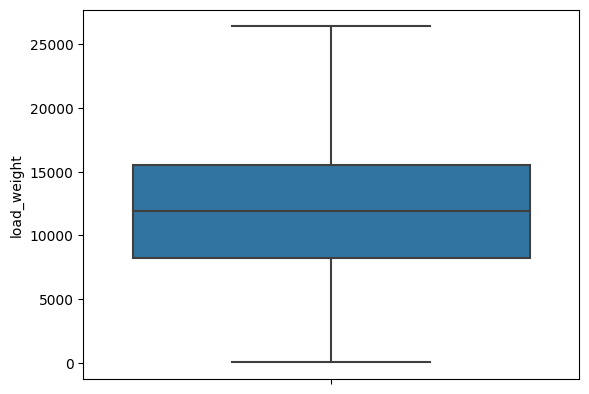

In [1090]:
#boxplot setelah outlier dihapus
sns.boxplot(data=organics_by_gosh, y = 'load_weight')

Dari gambar diatas dapat dilihat sudah tidak ada outlier seperti sebelumnya. Selanjutnya membuat visualisasi histogram setelah outlier dihilangkan.

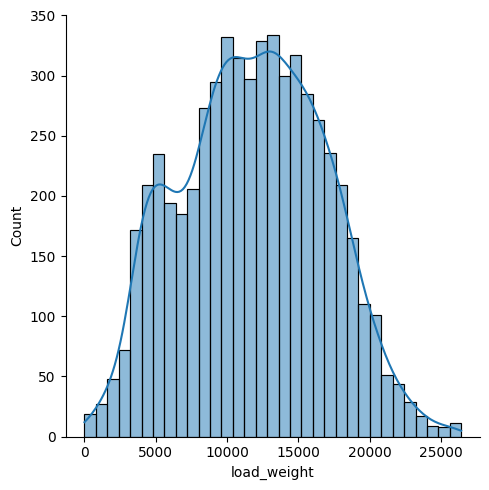

In [1091]:
# membuat histogram
sns.displot(organics_by_gosh.load_weight, kde=True)

Dari gambar diatas dapat dilihatkan kalau data __terdistribusi normal (Gaussian)__.

Selanjutnya dapat dicari kemiringan (_skew_) dari data yang outliernya telah dihilangkan.

In [1092]:
#menghitung skew/kemiringan
organics_by_gosh['load_weight'].skew()


0.04252980841087013

nilai kemiringan (_skew_) yaitu __0,043__ menunjukan kalau kemiringannya simetris.

## Central tendency setelah outlier dihilangkan

- mean

In [1093]:
#menghitung mean
organics_by_gosh['load_weight'].mean()

11838.824995611725

Nilai mean berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ setelah outlier dihilangkan sebesar __11.838,83__ kg.

- Q1,Q2 dan Q3

In [1094]:
#menghitung kuartil
organics_by_gosh['load_weight'].quantile([0.25,0.50,0.75])

0.25     8180.0
0.50    11940.0
0.75    15540.0
Name: load_weight, dtype: float64

Nilai kuartil 1, kuartil 2 (_median_) dan kuartil 3 berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ setelah outlier dihilangkan sebesar __8.180__ kg, __11.940__ kg dan __15.540__ kg.

- modus

In [1095]:
#modus
organics_by_gosh.apply(pd.Series.mode)

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-04-01,ORGANICS,2021-03-09 12:00:00 UTC,14580.0,ORGANICS BY GOSH


Nilai modus berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ setelah outlier dihilangkan sebesar __14.580__ kg. 

## New Site

Pemerintah kota Austin berencana membangun tempat pembuangan sampah baru. Beliau meminta analisa dan saran dari kita terkait kapasitas penampungan di tempat pembuangan sampah yang baru berdasarkan perhitungan _confidence interval_. 
Berdasarkan pengamatan yang telah dilakukan sebelumnya tentang jenis sampah limbah organis, diasumsikan pemerintah akan membangun tempat pembuangan baru untuk jenis sampah limbah organis.
Langkah selanjutnya dapat mencari nilai _confidence interval_.


### Confidence Interval

Sebelum menentukan nilai confidence interval kita perlu mengetahui jumlah nilai muatan setiap harinya dengan cara berikut:

In [1096]:
# menentukan daily input total dalam per hari
daily_input = organics_by_gosh.groupby(by="report_date",sort=True)["load_weight"].apply(pd.Series.sum).to_frame()


In [1097]:
#confidence interval asumsi nilai confidence level 0.90
confidence_interval = stats.norm.interval(0.90, daily_input.load_weight.mean(), daily_input.load_weight.std())
confidence_interval

(32949.70342951937, 872362.8603288697)

Didapatkan confidence interval berat limbah organik yang dibuang ke tempat pembuangan __ORGANICS BY GOSH__ dalam rentang waktu 2021-01-02 hingga 2021-07-08. Artinya jika Pemerintah Kota Austin ingin membangun tempah pembuangan untuk jenis sampah limbah organis harus memiliki kapasitas tampung antara __32.949__ kg - __872.363__ kg agar efisien.

# Hypothesis Testing

Berikut adalah jenis dari muatan sampah yang ada di kota Austin.

In [1098]:
# jenis sampah atau limbah yang dimuat
df_copy["load_type"].value_counts()

GARBAGE COLLECTIONS          8235
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5740
BULK                         1594
BRUSH                        1510
SWEEPING                      360
MIXED LITTER                  328
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Dapat dilihat terdapat jenis limbah __RECYCLING - SINGLE STREAM__ yang menunjukan jenis limbah yang dapat di daur ulang dan jenis limbah organis. Sebelum melakukan uji hipotesis dilakukan perhitungan rata-rata berat muatan per hari untuk jenis limbah daur ulang dan limbah organis.

In [1099]:
# mencari rata-rata load_weight per hari
daily_recycling = df_copy[df_copy['load_type']=='RECYCLING - SINGLE STREAM'][['report_date','load_weight']].groupby('report_date').sum()
daily_organics = df_copy[df_copy['load_type']=='ORGANICS'][['report_date','load_weight']].groupby('report_date').sum()

print('Average load weight of recycling load type a day: {} kg'.format(np.round(daily_recycling.load_weight.mean())))
print('Average load weight of organic load type a day: {} kg'.format(np.round(daily_organics.load_weight.mean())))

Average load weight of recycling load type a day: 491651.0 kg
Average load weight of organic load type a day: 452376.0 kg


Didapat rata-rata muatan jenis limbah daur ulang per hari sebesar __491.651__ kg. Nilai rata-rata muatan untuk jenis limbah organis per hari sebesar __452.376__ kg 

Selanjutnya membuat visualisasi dalam bentuk histogram seperti di bawah ini.

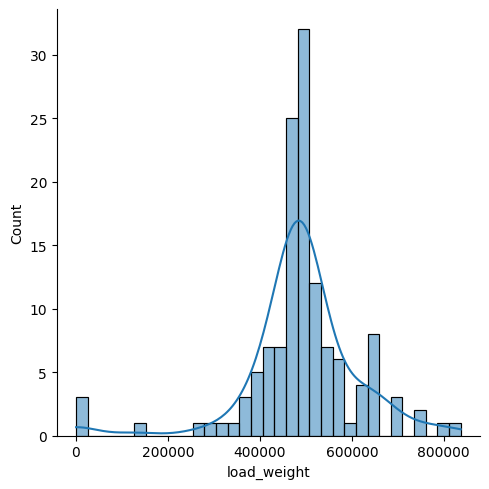

In [1100]:
sns.displot(daily_recycling.load_weight, kde=True)

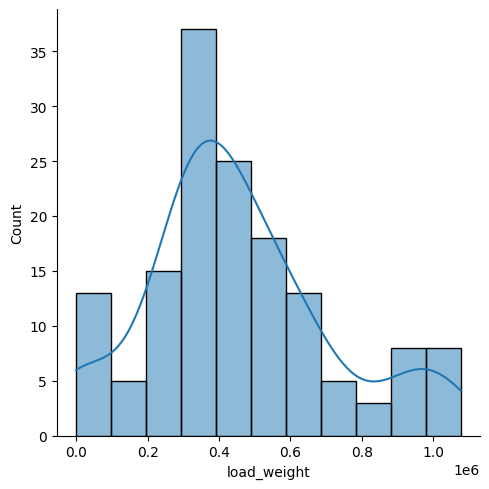

In [1101]:
sns.displot(daily_organics.load_weight, kde=True)

Dari 2 gambar diatas bisa dilihat kalau berat muatan ke 2 jenis limbah terdistribusi normal.

Selanjutnya dilakukan uji hipotesis.
Asumsi yang digunakan adalah dengan __2 sample 2 tails__. Hipotesis yang akan diuji adalah :

- Hipotesis 0 (_Null Hypothesis_) : nilai rata-rata berat limbah daur ulang per hari __ada perbedaan yang signifikan__ dengan nilai rata-rata berat limbah organis per hari.
- Hipotesis 1 (_Alternative Hypothesis_) : nilai rata-rata berat limbah daur ulang per hari __tidak ada perbedaan yang signifikan__ dengan nilai rata-rata berat limbah organis per hari.

```H0 : μ RECYCLING - SINGLE STREAM  = μ ORGANICS```

```H1 : μ RECYCLING - SINGLE STREAM != μ ORGANICS```

Uji hipotesis dilakukan untuk mengetahui apakah terdapat perbedaan yang signifikan dari nilai rata-rata berat limbah daur ulang per hari dengan nilai rata-rata berat limbah organis per hari.

## T-Test

Uji T dilakukan untuk mendapatkan nilai P dan t. Uji T dilakukan dengan menggunakan fungsi `scipy.stats.ttest_ind()`.

In [1102]:
# t-test
t_stat, p_val = stats.ttest_ind(daily_recycling['load_weight'], daily_organics['load_weight'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.11237805370418401
t-statistics: 1.5926006460725861


Didapat nilai P sebesar __0,11__ dimana apabila nilai __P > 0,05__ menunjukkan __gagal tolak H0__ atau __tidak ada perbedaan yang signifikan__ nilai rata-rata berat muatan per hari jenis limbah daur ulang dan jenis limbah organis. . Untuk lebih jelasnya dapat dilihat dari gambar dibawah ini.

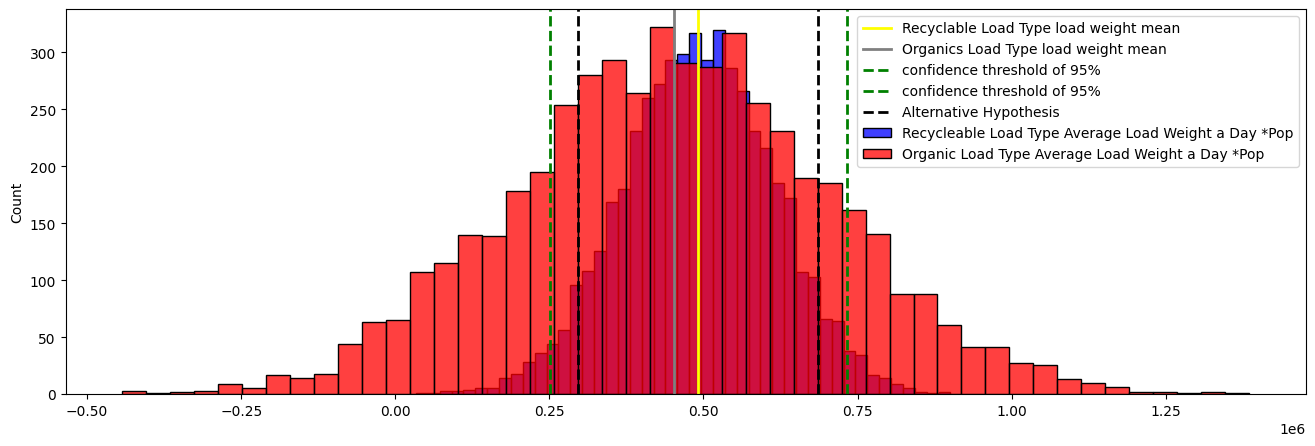

In [1103]:
# simulation
# numpy.random.normal (loc = rata-rata , scale = standar deviasi, size = asumsi 10.000 sample)
recycling_pop = np.random.normal(daily_recycling['load_weight'].mean(),daily_recycling['load_weight'].std(),5000)
organics_pop = np.random.normal(daily_organics['load_weight'].mean(),daily_organics['load_weight'].std(),5000)

# confidence interval berdasarkan daily recyling karena μA, dengan confidence level 0.05
confidence_interval = stats.norm.interval(0.95, daily_recycling['load_weight'].mean(), daily_recycling['load_weight'].std())

#plot histogram
plt.figure(figsize=(16,5))
sns.histplot(recycling_pop, label='Recycleable Load Type Average Load Weight a Day *Pop',color='blue') # histogram recycle
sns.histplot(organics_pop, label='Organic Load Type Average Load Weight a Day *Pop ',color='red') # histogram organic

# plot nilai mean
plt.axvline(daily_recycling['load_weight'].mean(), color='yellow', linewidth=2, label='Recyclable Load Type load weight mean') # mean recycle
plt.axvline(daily_organics['load_weight'].mean(), color='gray',  linewidth=2, label='Organics Load Type load weight mean') # mean organic

#plot confidence interval 
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%') # confidence interval ORGANICS BY GOSH
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%') # confidence interval ON ROUTE HIGH DUMP

# alternative hypotesis
plt.axvline(recycling_pop.mean()+t_stat*recycling_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis') # sisi kanan
plt.axvline(recycling_pop.mean()-t_stat*recycling_pop.std(), color='black', linestyle='dashed', linewidth=2) # sisi kiri

plt.legend()

Dari gambar diatas, bisa dilihat alternative hypothesis (garis putus-putus hitam)  berada didalam rentang confidence interval (garis putus-putus hijau). Sehingga dapat ditarik kesimpulan __gagal tolak H0__ (_null hypothesis_) yang berarti __tidak ada perbedaan yang signifikan__ nilai rata-rata berat muatan per hari jenis limbah daur ulang dan jenis limbah organik.

## Saran untuk pemerintah

Uji hipotesis yang telah dilakukan dapat menjadi saran untuk pemerintah kota Austin sebagai pertimbangan apabila ingin membangun tempat pembuangan baru untuk jenis sampah yang dapat di daur ulang, dikarenakan nilai rata-rata muatan per hari nya tidak jauh berbeda dengan jenis limbah organik yang sebelumnya sudah direncanakan akan dibuat tempat pembuangan yang baru.

# Jawaban untuk Problem 1 (stats)

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

- Jawab :

Teknik yang digunakan untuk mengatasi outlier adalah _z-score rule_ dikarenakan datanya terdistribusi normal.

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk pembangunan tempat pembuangan baru?

- Jawab :

Confidence interval digunakan sebagai parameter untuk menentukan keakuratan dari metode pengambilan sampel, Pada kasus pembangunan tempat baru nilai confidence interval didapat dari mean dan standar deviasi data jumlah total berat muatan per hari suatu tempat pembuangan sampah, sehingga didapat rentang confindence interval sebagai acuan untuk menentukan kapasitas tampung sampah.

Confidence interval juga dapat menjadi sebagai tolak ukur untuk uji hipotesis, apabila _alternative hypothesis_ (H1) berada di luar rentang confidence interval menunjukkan tolak _null hypothesis_ (H0). Sebaliknya apabila nilai H1 berada didalam rentang confidence interval menunjukkan gagal tolak H0.

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

- Jawab :

Uji hipotesi yang diterapkan untuk _2 samples 2 tails_. Alasan memilih uji hipotesis tersebut karena ingin melihat apakah ada perbedaan yang signifikan nilai rata-rata berat muatan 2 jenis limbah yang berbeda. Dimana hasil uji hipotesis ini dapat menjadi pertimbangan apabila pemerintah kota Austin akan membangun tempat sampah baru khusus untuk jenis sampah tertentu.

# Math / Calculus

Langkah pertama dengan mengelompokan tanggal dan berat muatan yang ada pada dataset.

In [1104]:
#groupby
df1 = df_copy.groupby('report_date')['load_weight'].sum().to_frame()
df1

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


Tabel diatas menujukkan dataset yang sudah dikelompokkan berdasarkan tanggal dan berat muatan.

Selanjutnya melakukan perhitungan v (laju percepatan ) dengan rumus :

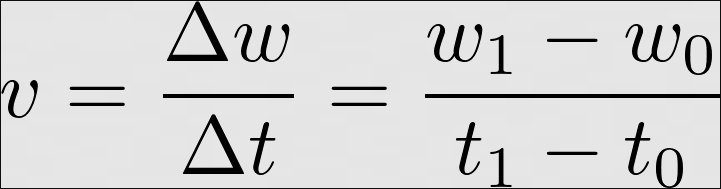

1 adalah notasi untuk hari ini (9 Juli 2021) dan 0 adalah notasi untuk hari sebelumnya

In [1105]:
v = np.diff(df1['load_weight'])/np.diff(range(len(df1)))


Setelah mendapatkan laju percepatan selanjutnya dapat dilakukan prediksi berat muatan untuk hari berikutnya dengan menggunakan rumus :

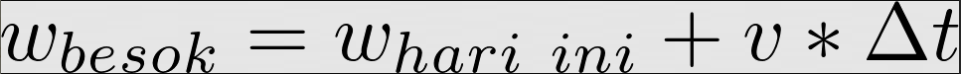

In [1106]:
# w hari ini adalah load_weight 9 juli 2021
#Δt = 1 karena untuk 1 hari ke depan (besok)
# index -1 karena data paling terakhir
load_weight_tommorow = df1['load_weight'][-1] + v[-1]*1
abs(load_weight_tommorow) #abs agar nilainya tidak minus

1187970.0

Didapatkan perkiraan berat muatan sampah dihari esok (10 Juli 2021) sebesar __1.187.970__ kg.

# Jawaban untuk Problem 2 (math)

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

- Jawab:

Pada kasus ini metode yang digunakan adalah numerik yaitu fungsi `numpy.diff()`.

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

- Jawab:

Ya diperlukan fungsi matematis untuk menghitung turunan. Dari rumus yang diberikan kita dapat menghitung dengan memasukkan nilai (_value_) dari data yang kita punya. Dengan begitu kita bisa menghitung turunan untuk memperkirakan berat muatan sampah di hari esok. 

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

- Jawab:

Perkiraan berat muatan sampah dihari esok (10 Juli 2021) sebesar __1.187.970__ kg.

# Kesimpulan

Dari hasil analisa data diketahui bahwa pengelolaan sampah di kota Austin kurang begitu bagus terutama hal pendistribusian sampah ke lokasi pembuangan. Terdapat beberapa data yang terduplikasi dan data berat muatan yang hilang. Karena distribusi sampah yang kurang merata, kemungkinan akan terjadi penumpukkan sampah di suatu tempat pembuangan yang dapat menimbulkan masalah di masa yang akan datang. Oleh karena itu distribusi sampah harus merata agar dapat dikelola dengan baik dan tidak ada masalah di masa yang akan datang.